In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline

In [62]:
dataset = 'CoLA'
num_layer = 12
num_heads = 12

In [63]:
def display_plot(image1):
    # read images
    img_A = mpimg.imread(image1)

    # display images
    fig, ax = plt.subplots(1,1 ,figsize=(10,10))
    ax.imshow(img_A);
    ax.axis('off')
    plt.show()

In [64]:
def display_side_by_side(image1, image2):
    # read images
    img_A = mpimg.imread(image1)
    img_B = mpimg.imread(image2)

    # display images
    fig, ax = plt.subplots(1,2 ,figsize=(15,15))
    ax[0].imshow(img_A);
    ax[0].axis('off')
    ax[1].imshow(img_B);
    ax[1].axis('off')

### following plots are generated with test set
### fine-tuned models are finetuned using train set
### seed is fixed

# Heads distribution of each layer

    captures distributions of 12 heads in the same layer
    left : before finetuning (on BERT-base)
    right : after finetuning

In [65]:
color_dict = {
            0 :'r',
            1 :'g',
            2 :'b',
            3 :'y',
            4 :'cyan',
            5 :'magenta',
            6 :'black',
            7 :'grey',
            8 :'orange',
            9 :'purple',
            10 :'navy',
            11 :'pink'
        }

In [66]:
f=open(f"../models/{dataset}/ablation_results.txt", "r")
accuracy = f.read().splitlines()
base_acc = round(float(accuracy[0]),5)
print(f"BASE ACCURACY : {base_acc}")

BASE ACCURACY : 0.82263




< LAYER 0 >


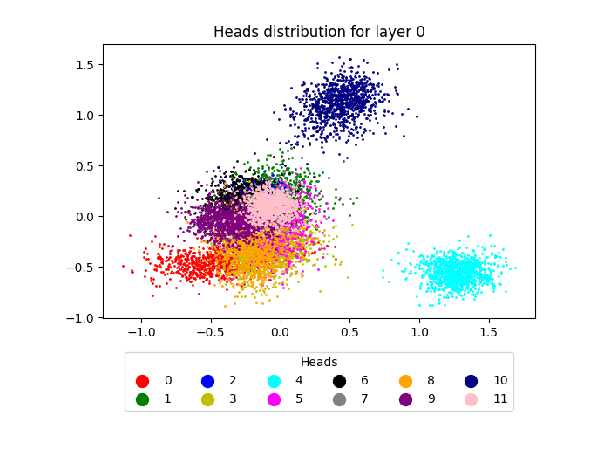

	 HEAD 0 = 0.82742 (-0.00479)
	 HEAD 1 = 0.82454 (-0.00191)
	 HEAD 2 = 0.82167 (0.00096)
	 HEAD 3 = 0.82646 (-0.00383)
	 HEAD 4 = 0.81975 (0.00288)
	 HEAD 5 = 0.82454 (-0.00191)
	 HEAD 6 = 0.82167 (0.00096)
	 HEAD 7 = 0.8255 (-0.00287)
	 HEAD 8 = 0.82263 (0.0)
	 HEAD 9 = 0.82359 (-0.00096)
	 HEAD 10 = 0.82646 (-0.00383)
	 HEAD 11 = 0.82263 (0.0)


In [67]:
layer_ind = 0
print(f"\n\n< LAYER {layer_ind} >")
display_plot(f"../head_distributions/{dataset}/attn-l{layer_ind}-heads.png")

for head_ind in range(num_heads):
    log_ind_base = ((num_heads*layer_ind) + head_ind) * 2
    ablated_acc = round(float(accuracy[log_ind_base+1]), 5)
    print(f"\t HEAD {head_ind} = {ablated_acc} ({round(base_acc - ablated_acc, 5)})")



< LAYER 1 >


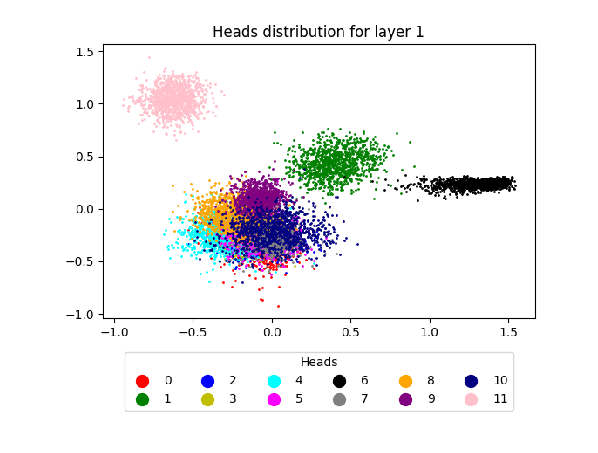

	 HEAD 0 = 0.81975 (0.00288)
	 HEAD 1 = 0.81975 (0.00288)
	 HEAD 2 = 0.82167 (0.00096)
	 HEAD 3 = 0.82167 (0.00096)
	 HEAD 4 = 0.82167 (0.00096)
	 HEAD 5 = 0.8255 (-0.00287)
	 HEAD 6 = 0.82454 (-0.00191)
	 HEAD 7 = 0.82263 (0.0)
	 HEAD 8 = 0.82071 (0.00192)
	 HEAD 9 = 0.82454 (-0.00191)
	 HEAD 10 = 0.81975 (0.00288)
	 HEAD 11 = 0.82263 (0.0)


In [68]:
layer_ind = 1
print(f"\n\n< LAYER {layer_ind} >")
display_plot(f"../head_distributions/{dataset}/attn-l{layer_ind}-heads.png")

for head_ind in range(num_heads):
    log_ind_base = ((num_heads*layer_ind) + head_ind) * 2
    ablated_acc = round(float(accuracy[log_ind_base+1]), 5)
    print(f"\t HEAD {head_ind} = {ablated_acc} ({round(base_acc - ablated_acc, 5)})")



< LAYER 10 >


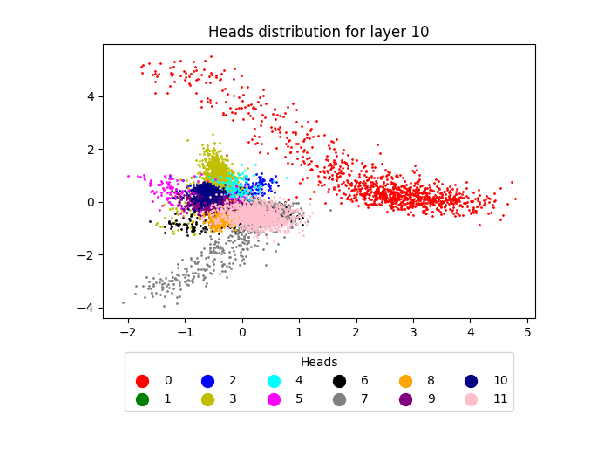

	 HEAD 0 = 0.82071 (0.00192)
	 HEAD 1 = 0.82071 (0.00192)
	 HEAD 2 = 0.82263 (0.0)
	 HEAD 3 = 0.82263 (0.0)
	 HEAD 4 = 0.82167 (0.00096)
	 HEAD 5 = 0.82359 (-0.00096)
	 HEAD 6 = 0.82359 (-0.00096)
	 HEAD 7 = 0.82071 (0.00192)
	 HEAD 8 = 0.82263 (0.0)
	 HEAD 9 = 0.81975 (0.00288)
	 HEAD 10 = 0.82167 (0.00096)
	 HEAD 11 = 0.82454 (-0.00191)


In [69]:
layer_ind = 10
print(f"\n\n< LAYER {layer_ind} >")
display_plot(f"../head_distributions/{dataset}/attn-l{layer_ind}-heads.png")

for head_ind in range(num_heads):
    log_ind_base = ((num_heads*layer_ind) + head_ind) * 2
    ablated_acc = round(float(accuracy[log_ind_base+1]), 5)
    print(f"\t HEAD {head_ind} = {ablated_acc} ({round(base_acc - ablated_acc, 5)})")



< LAYER 11 >


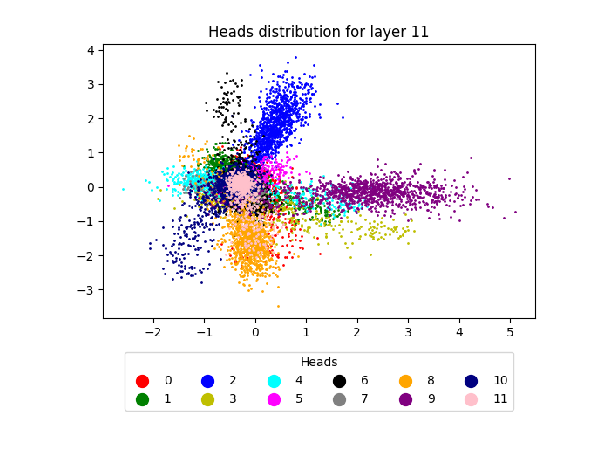

	 HEAD 0 = 0.82359 (-0.00096)
	 HEAD 1 = 0.82359 (-0.00096)
	 HEAD 2 = 0.82263 (0.0)
	 HEAD 3 = 0.82263 (0.0)
	 HEAD 4 = 0.82263 (0.0)
	 HEAD 5 = 0.82167 (0.00096)
	 HEAD 6 = 0.82263 (0.0)
	 HEAD 7 = 0.82263 (0.0)
	 HEAD 8 = 0.82359 (-0.00096)
	 HEAD 9 = 0.82263 (0.0)
	 HEAD 10 = 0.81975 (0.00288)
	 HEAD 11 = 0.82263 (0.0)


In [70]:
layer_ind = 11
print(f"\n\n< LAYER {layer_ind} >")
display_plot(f"../head_distributions/{dataset}/attn-l{layer_ind}-heads.png")

for head_ind in range(num_heads):
    log_ind_base = ((num_heads*layer_ind) + head_ind) * 2
    ablated_acc = round(float(accuracy[log_ind_base+1]), 5)
    print(f"\t HEAD {head_ind} = {ablated_acc} ({round(base_acc - ablated_acc, 5)})")

# Variance Study

    Difference in the amount of variance explained by the two components from PCA
    
    1. calculate variance explained for each heads (12 layers * 12 heads * 2 components)
    2. for each pair, compute the difference
    3. compute average for each layer
    
    numbers in bracket is difference in the (aggregated - 2 componenets) percentage of variance explained 
    

- layer 0 : -0.009700178169 ( -0.004618635401 )
- layer 1 : -0.002130121148 ( -0.01102727962 )
- layer 2 : -0.0005090703877 ( -0.008767988533 )
- layer 3 : -0.008532019642 ( -0.0001414188494 )
- layer 4 : -0.01443783442 ( 0.01288391898 )
- layer 5 : -0.006370164144 ( 0.009677752232 )
- layer 6 : -0.02571878924 ( -0.007680003531 )
- layer 7 : -0.001414982602 ( -0.01829779334 )
- layer 8 : 0.1295127854 ( 0.05322728865 )
- layer 9 : 0.3625547122 ( 0.1430218257 )
- layer 10 : 0.7758189954 ( 0.3924566129 )
- layer 11 : 1.779233397 ( 0.5672445898 )